In [61]:
from random import random
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 10000000/10000000 [00:04<00:00, 2164722.29it/s]


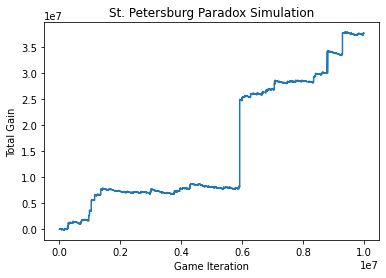

In [66]:
PRICE_FOR_GAME = 10

tot = 0
tot_history = [0]

for _ in tqdm(range(10_000_000)):
    gain = 1
    while True:
        if random() < 0.5:
            tot += gain - PRICE_FOR_GAME
            tot_history.append(tot)
            break
        else:
            gain *= 2

plt.plot(tot_history)
plt.xlabel('Game Iteration')
plt.ylabel('Total Gain')
plt.title('St. Petersburg Paradox Simulation')
plt.show()

100%|██████████| 16/16 [00:40<00:00,  2.52s/it]


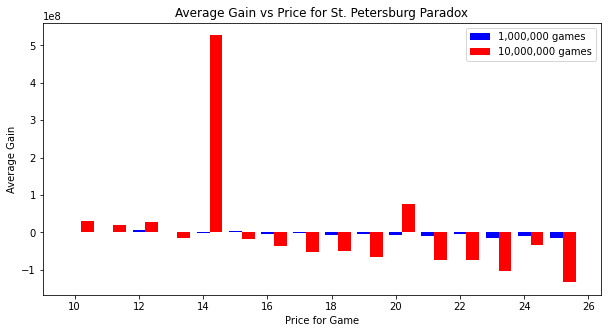

In [63]:
# find the average value of tot for every price

START = 10
END   = 25

tot_list = [[0] * (END - START + 1) for _ in range(2)]

for price in tqdm(range(START, END+1)):
    tot = 0
    for _ in range(1_000_000):
        gain = 1
        while True:
            if random() < 0.5:
                tot += gain - price
                break
            else:
                gain *= 2
    tot_list[0][price - START] = tot
    for _ in range(9_000_000):
        gain = 1
        while True:
            if random() < 0.5:
                tot += gain - price
                break
            else:
                gain *= 2
    tot_list[1][price - START] = tot

# put bar not overlapping
plt.figure(figsize=(10, 5))
plt.bar(range(START, END + 1), tot_list[0], width=0.4, color='blue', label='1,000,000 games', align='center')
plt.bar([x + 0.4 for x in range(START, END + 1)], tot_list[1], width=0.4, color='red', label='10,000,000 games', align='center')
plt.legend()
plt.xlabel('Price for Game')
plt.ylabel('Average Gain')
plt.title('Average Gain vs Price for St. Petersburg Paradox')
plt.show()